# Curvas de restauração
Uma estrutura flutuante é ancorada por duas linhas.

Cada linha pesa 0,2165kN/m na água e possui um comprimento total de 2800m, sendo instalada com tração horizontal de topo igual 400kN na posição de projeto.

A profundidade da água é igual a 500m e considera-se que as conexões das linhas com a unidade flutuante estão localizadas na superfície da água.

Pede-se:

* Determinar a curva de restauração de uma linha de ancoragem isolada. 
* Determinar a curva de restauração do sistema de ancoragem composto pelas duas linhas.

**Obs.:**

Considerar um offset máximo da UF igual a 10% da lâmina d’água para os sentidos “near” e “far”. Apresentar as curvas na forma de tabela e gráfico considerando incrementos de 10m até o offset máximo.

## Dados do problema

Importando bibliotecas que serão usadas na resolução do problema:

In [1]:
import numpy as np
from scipy import optimize

from matplotlib import pyplot as plt

Dados do enunciado:

In [2]:
unF = 'kN'
unD = 'm'

q = 0.2165 #peso submerso (kN/m)
lc = 2800.0 #comprimento (m)
fh0 = 400.0 #força horizontal de topo (kN) para configuração de projeto
lda = 500.0 #lâmina d'água (m)
offset = 0.1 * lda #offset máximo da boia (m)
n = 5 #número de incrementos em uma direção
ninc = n*2 + 1 #número de incrementos totais

#vetor com todos os incrementos de offset que serão aplicados
delta = np.linspace(-offset,offset,ninc,dtype = float)

## Configuração neutra

In [3]:
a0 = fh0/q
xs0 = a0 * np.arccosh((lda+a0)/a0)
s0 = a0 * np.sinh(xs0/a0)
xa0 = lc - s0
xt0 = xs0 + xa0

print('Parâmetro da catenária = ','%10.3f' %a0, unD)
print('Projeção horizontal suspensa = ','%10.3f' %xs0, unD)
print('Comprimento apoiado = ','%10.3f' %xa0, unD)
print('Comprimento suspenso = ','%10.3f' %s0, unD)
print('Projeção horizontal total = ','%10.3f' %xt0, unD)

Parâmetro da catenária =    1847.575 m
Projeção horizontal suspensa =    1330.330 m
Comprimento apoiado =    1351.699 m
Comprimento suspenso =    1448.301 m
Projeção horizontal total =    2682.029 m


## Solução do sistema de equações

Considerando que a UF sofre um offset $\Delta$ para uma nova posição "1", teremos as seguintes equações que regem o equilíbrio na nova posição:

$$F_{h1} = a_1 \cdotp q$$

$$x_{s1} = a_1 \cdotp arccosh(\frac{LDA+a_1}{a_1})$$

$$x_{s1} + x_{a1} = x_{s0} + x_{a0} + \Delta$$

$$s_1 = a_1 \cdotp sinh(\frac{x_{s1}}{a_1})$$

$$s_1 + x_{a1} = L_c$$

Sendo assim, temos 5 equações e 5 incógnitas ($F_{h1}$, $a_1$, $x_{s1}$, $x_{a1}$ e $s_1$).

Resolvendo o sistema de equações para todas as posições de $\Delta$:

In [4]:
#função para solução do sistema de equações -------------------------
def f(x):
  fh = x[0]
  a = x[1]
  xs = x[2]
  xa = x[3]
  s = x[4]
  
  return [fh - a*q,
          xs - a*np.arccosh((lda+a)/a),
          xs + xa - xt0 - dinc,
          s - a*np.sinh(xs/a),
          s + xa - lc]

#inicialização de variáveis -----------------------------------------
sol = np.zeros((ninc,5),dtype=float)

#solução do sistema de equações para todos os valores de delta-------
for i in range(0,ninc):
  dinc = delta[i]
  sol[i] = optimize.fsolve(f,[fh0,a0,xs0,xa0,s0])
  print('Delta = ','%10.3f' %dinc, unD)
  print('---------------------')
  print('Força horizontal de topo = ','%10.3f' %sol[i,0], unF)
  print('Parâmetro da catenária = ','%10.3f' %sol[i,1], unD)
  print('Proj. horiz. suspensa = ','%10.3f' %sol[i,2], unD)
  print('Comprimento apoiado = ','%10.3f' %sol[i,3], unD)
  print('Comprimento suspenso = ','%10.3f' %sol[i,4], unD)
  print()

Delta =     -50.000 m
---------------------
Força horizontal de topo =     181.397 kN
Parâmetro da catenária =     837.863 m
Proj. horiz. suspensa =     875.036 m
Comprimento apoiado =    1756.993 m
Comprimento suspenso =    1043.007 m

Delta =     -40.000 m
---------------------
Força horizontal de topo =     209.153 kN
Parâmetro da catenária =     966.064 m
Proj. horiz. suspensa =     944.782 m
Comprimento apoiado =    1697.247 m
Comprimento suspenso =    1102.753 m

Delta =     -30.000 m
---------------------
Força horizontal de topo =     242.747 kN
Parâmetro da catenária =    1121.235 m
Proj. horiz. suspensa =    1023.027 m
Comprimento apoiado =    1629.003 m
Comprimento suspenso =    1170.997 m

Delta =     -20.000 m
---------------------
Força horizontal de topo =     283.932 kN
Parâmetro da catenária =    1311.463 m
Proj. horiz. suspensa =    1111.614 m
Comprimento apoiado =    1550.415 m
Comprimento suspenso =    1249.585 m

Delta =     -10.000 m
---------------------
Força ho

## Curva de restauração de uma linha

Podemos plotar a curva de restauração de uma linha isolada. Essa curva mostra a força de restauração horizontal que a linha exerce na unidade flutuante para cada $\Delta$ de deslocamento até o offset máximo do problema.

Nesse problema, os "offsets negativos" correspondem aos deslocamentos no sentido "near", enquanto que os "offsets positivos" correspondem aos deslocamentos no sentido "far".

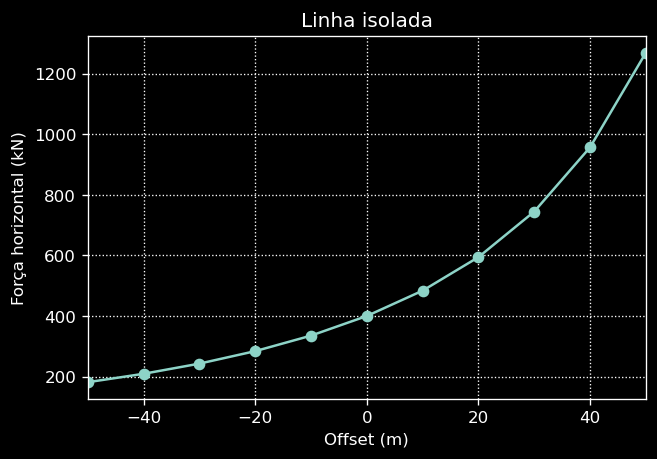

In [5]:
fh = np.zeros(ninc)
for i in range(0,ninc):
  fh[i] = sol[i,0]

plt.figure(dpi=120)
plt.plot(delta,fh,marker='o')
plt.xlim(-1.0*offset,offset)
plt.xlabel("Offset (" + unD + ')')
plt.ylabel("Força horizontal (" + unF + ")")
plt.title("Linha isolada")
plt.grid(True,'major','both',ls=':')
plt.show()

Ressalta-se que sem a presença da outra linha, o sistema ficaria desequilibrado na posição neutra. Entretanto, a curva apresentada para uma linha isolada é um parâmetro interessante de ser observado.

Podemos aproveitar e visualizar as deformadas da linha isolada para todas as posições de offset $\Delta$.

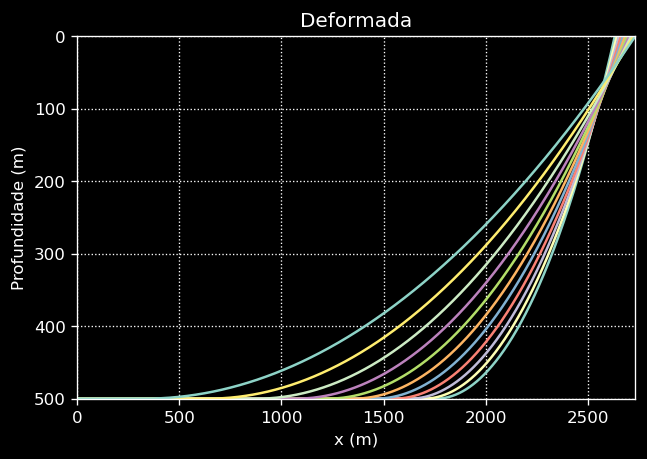

In [6]:
#equação da catenária -----------------------------------------------
def y(x):
  return a * (np.cosh(x/a)-1)

#função que cria vetores xcat e ycat para plotagem de uma catenária -
def monta_cat(a,xs,xa):
  xt = xs + xa
  xcat = np.arange(0.0,xt,1.0)
  xcat = np.append(xcat,xt)
  ycat = np.zeros(len(xcat),dtype=float)
  
  for i in range(0,len(xcat)):
    if xcat[i] > xa:
      ycat[i] = lda - y(xcat[i]-xa)
    else:
      ycat[i] = lda

  return xcat,ycat

#plota cada catenária obtida no vetor solução -----------------------
plt.figure(dpi=120)
for item in sol:
  a = item[1]
  xs = item[2]
  xa = item[3]
  xcat,ycat = monta_cat(a,xs,xa)
  plt.plot(xcat,ycat)

#define parâmetros do gráfico ---------------------------------------
plt.xlim(0,xt0+offset)
plt.ylim(lda,0)
plt.xlabel("x (" + unD +")")
plt.ylabel("Profundidade (" + unD + ")")
plt.title("Deformada")
plt.grid(True,'major','both',ls=':')
plt.show()

## Curva de restauração do sistema de ancoragem

A força de restauração horizontal será igual ao desequilíbrio de forças entre as duas linhas do sistema:

In [7]:
#força horizontal de topo para as linhas 1 e 2 ----------------------
fh1 = fh
fh2 = np.flip(fh1)

#força de restauração do sistema completo ---------------------------
fhr = fh2-fh1
for i in range(0,ninc):
  print('Fh para offset = ','%10.3f' %delta[i], unD,'--->','%10.3f' %fhr[i], unF)

Fh para offset =     -50.000 m --->   1087.949 kN
Fh para offset =     -40.000 m --->    747.745 kN
Fh para offset =     -30.000 m --->    502.078 kN
Fh para offset =     -20.000 m --->    310.396 kN
Fh para offset =     -10.000 m --->    148.527 kN
Fh para offset =       0.000 m --->      0.000 kN
Fh para offset =      10.000 m --->   -148.527 kN
Fh para offset =      20.000 m --->   -310.396 kN
Fh para offset =      30.000 m --->   -502.078 kN
Fh para offset =      40.000 m --->   -747.745 kN
Fh para offset =      50.000 m --->  -1087.949 kN


Observando o resultado na forma de um gráfico:

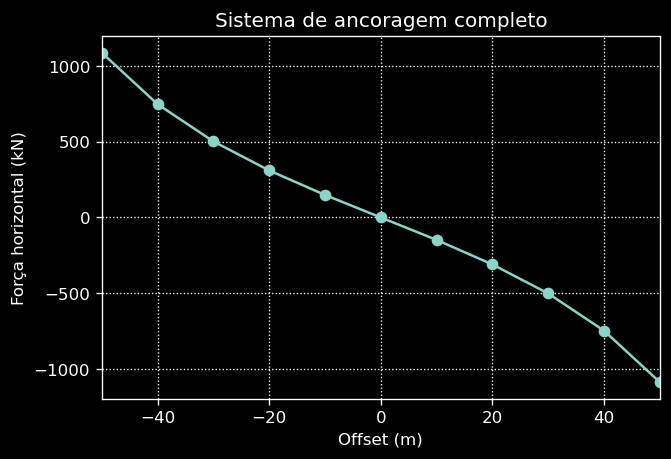

In [8]:
plt.figure(dpi=120)
plt.plot(delta,fhr,marker='o')
plt.xlim(-1.0*offset,offset)
plt.xlabel("Offset (" + unD + ")")
plt.ylabel("Força horizontal (" + unF + ")")
plt.title("Sistema de ancoragem completo")
plt.grid(True,'major','both',ls=':')
plt.show()